In [1]:
!pip install sktime

     ---------------------------------------- 0.0/17.0 MB ? eta -:--:--
      --------------------------------------- 0.3/17.0 MB 7.2 MB/s eta 0:00:03
     -- ------------------------------------- 0.9/17.0 MB 9.5 MB/s eta 0:00:02
     --- ------------------------------------ 1.5/17.0 MB 11.0 MB/s eta 0:00:02
     ----- ---------------------------------- 2.4/17.0 MB 12.5 MB/s eta 0:00:02
     ------- -------------------------------- 3.3/17.0 MB 14.2 MB/s eta 0:00:01
     ---------- ----------------------------- 4.4/17.0 MB 15.8 MB/s eta 0:00:01
     ------------- -------------------------- 5.6/17.0 MB 17.2 MB/s eta 0:00:01
     --------------- ------------------------ 6.6/17.0 MB 18.5 MB/s eta 0:00:01
     ------------------ --------------------- 8.0/17.0 MB 19.7 MB/s eta 0:00:01
     --------------------- ------------------ 9.3/17.0 MB 20.5 MB/s eta 0:00:01
     ------------------------ -------------- 10.5/17.0 MB 22.6 MB/s eta 0:00:01
     ------------------------ -------------- 10.5/


[notice] A new release of pip is available: 23.0 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


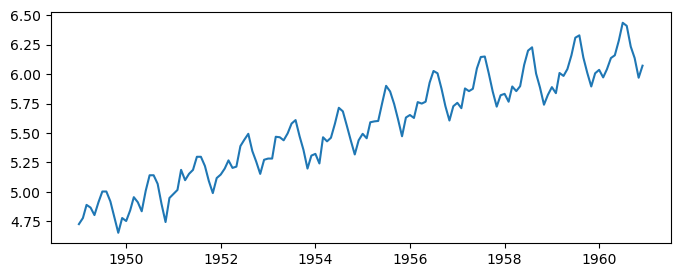

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sktime.datasets import load_airline

y = load_airline() #특정항공의 승객수 
y = y.to_timestamp() # Period 데이터를 DatetimeIndex로 변환
y = np.log(y + 1) #로그 변환 


plt.figure(figsize = (8,3))
plt.plot(y)
plt.show()

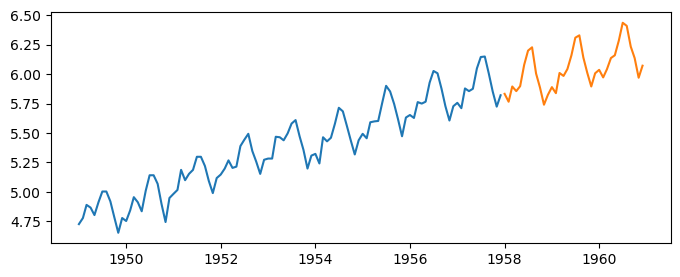

In [27]:
from sktime.forecasting.model_selection import temporal_train_test_split #시계열 데이터를 훈련 세트와 테스트 세트로 분할에 사용
y_train , y_test = temporal_train_test_split(y) #test size 정해줄 수 있는데 default 는 0.2 
#이렇게 설정하면 y_train은 전체 데이터의 80%를, y_test는 전체 데이터의 20%를 갖게 됩니다.

plt.figure(figsize=(8,3))
plt.plot(y_train)
plt.plot(y_test)

plt.show()

In [30]:
from sktime.forecasting.base import  ForecastingHorizon #모델한테 줄수있게 박싱을 함 
from sktime.forecasting.theta import ThetaForecaster #. 주어진 시계열 데이터의 추세와 계절성을 캡처하여 예측을 생성

y = load_airline() 
y_train , y_test = temporal_train_test_split(y)
y_fh = ForecastingHorizon(y_test.index , is_relative= False) #예측하고자 하는 대상을 포장, 예측할 시간대만 넣어야지 값을 넣으면 안됨 
                           #is_relative가 True이면 y_test.index 길이만큼, trainset이 종료되는 시점부터 이어서 이 길이만큼 예측. 
                           #False는 종료지점이 상관없이 index의 해당하는 날자의 값을 예측해줌 

fc = ThetaForecaster(sp = 12) #sp (Seasonal Period 계절성주기) 얼마만큼 계절정 주기를 가지는지 
                              #데이터가 매년 같은 패턴을 가지며, 매년 동일한 월에 반복되는 계절성 패턴이 있다고 가정
fc.fit(y_train)
p_test = fc.predict(y_fh)
p_test

Period
1958-01    341.456422
1958-02    337.564661
1958-03    388.128055
1958-04    372.625119
1958-05    371.882597
1958-06    421.552202
1958-07    461.671562
1958-08    457.651131
1958-09    407.134111
1958-10    354.872813
1958-11    309.248681
1958-12    351.290690
1959-01    355.075758
1959-02    350.984167
1959-03    403.506705
1959-04    387.340913
1959-05    386.520891
1959-06    438.091373
1959-07    479.725746
1959-08    475.489958
1959-09    422.952449
1959-10    368.616151
1959-11    321.186583
1959-12    364.808052
1960-01    368.695095
1960-02    364.403672
1960-03    418.885354
1960-04    402.056706
1960-05    401.159186
1960-06    454.630544
1960-07    497.779931
1960-08    493.328786
1960-09    438.770786
1960-10    382.359489
1960-11    333.124485
1960-12    378.325414
Freq: M, Name: Number of airline passengers, dtype: float64

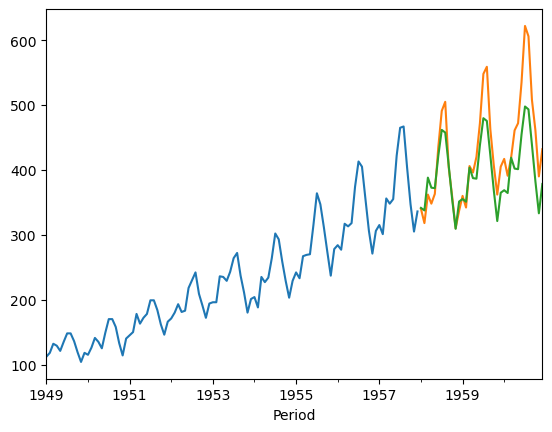

In [33]:
y_train.plot()
y_test.plot()
p_test.plot()
plt.show()

In [34]:
from sktime.performance_metrics.forecasting import mean_absolute_percentage_error
mean_absolute_percentage_error(y_test , p_test)
# 8 % 의 오차가 있다. 

0.08174636642563211

In [78]:



from sktime.datasets import load_acsf1 #(참고용)
X , y = load_acsf1()
temporal_train_test_split(y,X) # forecast 쪽에서만 이렇게 y 가 먼저 써줌 




[array(['9', '9', '9', '9', '9', '9', '9', '9', '9', '9', '3', '3', '3',
        '3', '3', '3', '3', '3', '3', '3', '4', '4', '4', '4', '4', '4',
        '4', '4', '4', '4', '0', '0', '0', '0', '0', '0', '0', '0', '0',
        '0', '6', '6', '6', '6', '6', '6', '6', '6', '6', '6', '5', '5',
        '5', '5', '5', '5', '5', '5', '5', '5', '2', '2', '2', '2', '2',
        '2', '2', '2', '2', '2', '8', '8', '8', '8', '8', '8', '8', '8',
        '8', '8', '7', '7', '7', '7', '7', '7', '7', '7', '7', '7', '1',
        '1', '1', '1', '1', '1', '1', '1', '1', '1', '9', '9', '9', '9',
        '9', '9', '9', '9', '9', '9', '3', '3', '3', '3', '3', '3', '3',
        '3', '3', '3', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4',
        '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '6', '6', '6',
        '6', '6', '6', '6', '6', '6', '6'], dtype='<U1'),
 array(['5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '2', '2', '2',
        '2', '2', '2', '2', '2', '2', '2', '8', '8', '8', '8', '8'

In [79]:
from sktime.datasets import load_arrow_head
X,y = load_arrow_head()
y

array(['0', '1', '2', '0', '1', '2', '0', '1', '2', '0', '1', '2', '0',
       '1', '2', '0', '1', '2', '0', '1', '2', '0', '1', '2', '0', '1',
       '2', '0', '1', '2', '0', '1', '2', '0', '1', '2', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2',
       '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2

In [80]:
from sklearn.model_selection import train_test_split
X_train , X_test, y_train ,y_test = train_test_split(X,y)

In [81]:
from sktime.classification.interval_based import TimeSeriesForestClassifier
# 인터벌 기반 분류는 시계열 데이터를 일정한 길이의 구간(interval)로 분할하여 
#각 구간에서 추출한 특징(feature)을 사용하여 분류 모델을 구축 

# TimeSeriesForestClassifier 객체 생성
forest = TimeSeriesForestClassifier()

# 시계열 데이터를 사용하여 분류 모델 훈련
forest.fit(X_train , y_train)#알아서 최적의 경로를 찾음 . 

# 새로운 시계열 데이터에 대해 분류 수행
p_test = forest.predict(X_test)
p_test

array(['0', '0', '2', '2', '1', '1', '0', '0', '1', '1', '1', '0', '0',
       '2', '0', '1', '1', '0', '1', '1', '2', '0', '2', '1', '1', '0',
       '2', '0', '1', '1', '0', '1', '0', '2', '0', '2', '0', '0', '0',
       '2', '1', '0', '0', '1', '0', '0', '2', '0', '1', '0', '2', '1',
       '0'], dtype='<U1')

In [82]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test , p_test)
# 81% 정도 맞춤. 

0.8301886792452831

In [83]:
from IPython.display import display, Image 
image_url = 'https://www.researchgate.net/publication/318229494/figure/fig4/AS:667947236352017@1536262439899/Comparison-of-Euclidean-Distance-Measurements-and-DTW.png' 
display(Image(url=image_url ,width=400))

In [73]:
!pip install numba


[notice] A new release of pip is available: 23.0 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [84]:
from sktime.clustering.k_means import TimeSeriesKMeans
#시계열거리 잴때 euclidean 보단 DTW 많이씀  (Dynamic Time warping matching )
# 모양이 비슷해도 시간대가 틀리면 다르다고 Euclidean 은 판단 그래서 DTW 많이씀. 

km = TimeSeriesKMeans(n_clusters = 5 , 
                      init_algorithm= "forgy" , metric = "dtw")
km.fit(X_train)

TimeSeriesKMeans(init_algorithm='forgy', n_clusters=5)

<Figure size 500x1000 with 0 Axes>

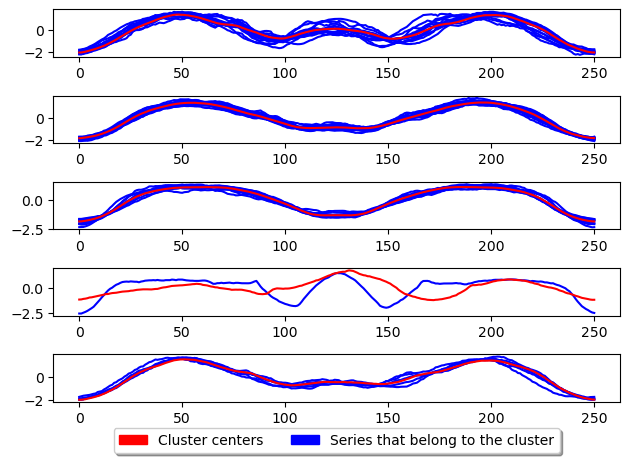

In [85]:
from sktime.clustering.utils.plotting._plot_partitions import plot_cluster_algorithm
plot_cluster_algorithm(km , X_test , km.n_clusters) #plot_cluster_algorithm(모델 , (그림그리고싶은)테스트데이터, 클러스터개수 )
#빨간색 클루스터 대표 클론

In [87]:
df = pd.DataFrame([[10.6,0], #0 == 이상없음 1== 이상발상
              [7.3,0],
              [7.0,0],  
              [11.2,1], #이상이 발생한시점.  이 이상이 발생하기 직전. 
              [18.4,1]])

In [94]:
X = df.iloc[:,0].values
y = df.iloc[:,1].values

array([10.6,  7.3,  7. , 11.2, 18.4])

In [115]:
#데이터가 작을땐 이렇게 해도됨 .
stride = 2 

X_t = []

for i in range(stride - 1,len(X)): #0부터하면 이전숫자를 뽑아낼때 0인 위치에서 이전숫자가 없으니 1~  
    print(X[i - (stride - 1):i+1] , y[i])
    X_t.append(X[i - (stride - 1):i+1])
X_t = np.array(X_t)
X_t

[10.6  7.3] 0
[7.3 7. ] 0
[ 7.  11.2] 1
[11.2 18.4] 1


array([[10.6,  7.3],
       [ 7.3,  7. ],
       [ 7. , 11.2],
       [11.2, 18.4]])

In [116]:
y[stride-1:]

array([0, 0, 1, 1], dtype=int64)

In [117]:
np.lib.stride_tricks.sliding_window_view(X , window_shape= stride)

array([[10.6,  7.3],
       [ 7.3,  7. ],
       [ 7. , 11.2],
       [11.2, 18.4]])

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [3]:
#실습 
heart =pd.read_csv("C:/Users/carlo/Desktop/AI_CWNU/documents/heart.csv")  
heart

# age 나이
# sex 성별 1= 남자 , 0 = 여자 
# cp  0인건 무증상  , 1 = 전형적인 협신증 , 2 = 비정형 협신증 통증 , 3 = 협신증 외 통증 
# trbps 안정시 혈압 
# chol 콜레스테롤 수치 
# fbs 공복 혈당  0 이면 120 이하 1 이면 초과
# restecg 심전도 (휴식취할때)  0 = 보통 , 1  = 파형이상 , 2 =  좌심실 비대 
# thalachh 최대 심박수 
# exng 운동유발협심증   0  = 아니오  , 1  = 예 (증상있음)
# oldpeak 튀는값의 크기 
# slp (speak language passology )언어 어눌한지 정도  0 = 증상없음 ,1 = 있음 , 2= 심함
# caa 주요한 혈관수 (심장병판별하는데 중요한 )
# thall 빈혈정도 
# output 1= 심장위험도 높음 0 = 낮음

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [5]:
#결측치 확인 
heart.isna().sum()

# age별 , chol평균  구해서 
X = heart[["age", "chol"]]
y = heart["output"]
X

,age,chol
0,63,233
1,37,250
2,41,204
3,56,236
4,57,354
...,...,...
298,57,241
299,45,264
300,68,193
301,57,131


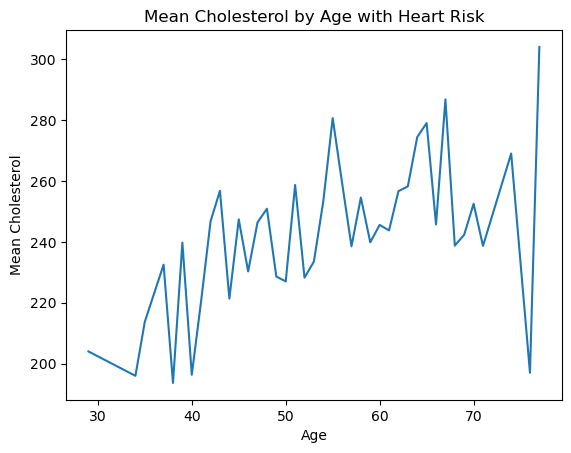

In [6]:
#나이별 평균 콜레스테롤 수치 
avgAge = X.groupby("age")['chol'].mean() #제일 낮은 나이 29  #제일 높은 나이 77
plt.plot(avgAge)
plt.xlabel("Age")
plt.ylabel("Mean Cholesterol")
plt.title("Mean Cholesterol by Age with Heart Risk")
plt.show()  

In [7]:
#심장 위협도  높, 낮 사람수 파악 
y.value_counts()

1    165
0    138
Name: output, dtype: int64

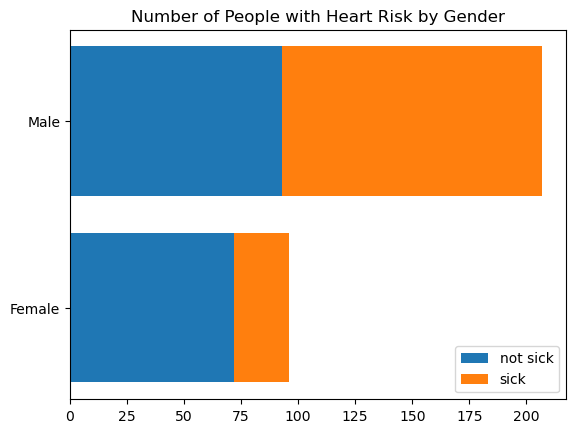

In [8]:
import matplotlib.pyplot as plt
# 남녀별 심장 위험도 개수 계산
Ocount = heart.groupby("sex")["output"].value_counts().unstack()
 
fig = plt.figure()
ax = fig.add_subplot(111) 

ax.barh(Ocount.index, Ocount[1], label="not sick")
ax.barh(Ocount.index, Ocount[0], label="sick", left=Ocount[1].values)

ax.set_yticks([0, 1])
ax.set_yticklabels(["Female", "Male"])
ax.set_title("Number of People with Heart Risk by Gender") 
ax.legend() 
plt.show() 

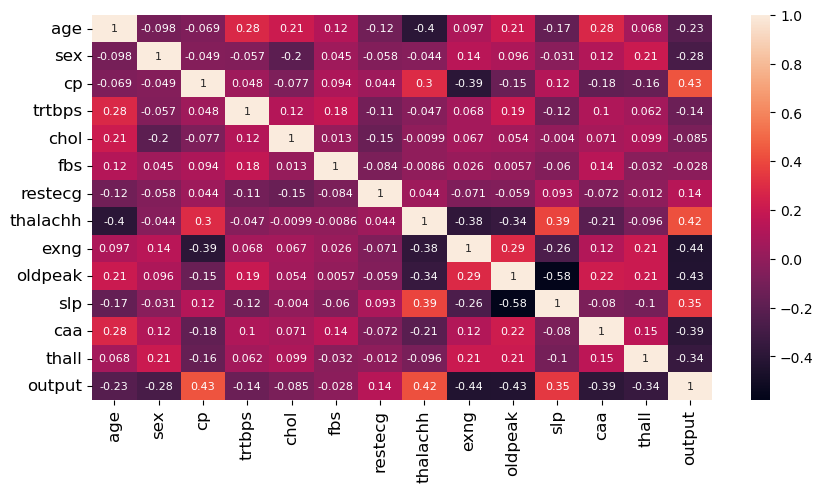

In [9]:
#히트맵 유사도 파악
import seaborn as sns
plt.figure(figsize= (10,5))

sns.heatmap(heart.corr(), annot= True, annot_kws= {'size':8})
plt.xticks(fontsize= 12)
plt.yticks(fontsize= 12)
plt.show()

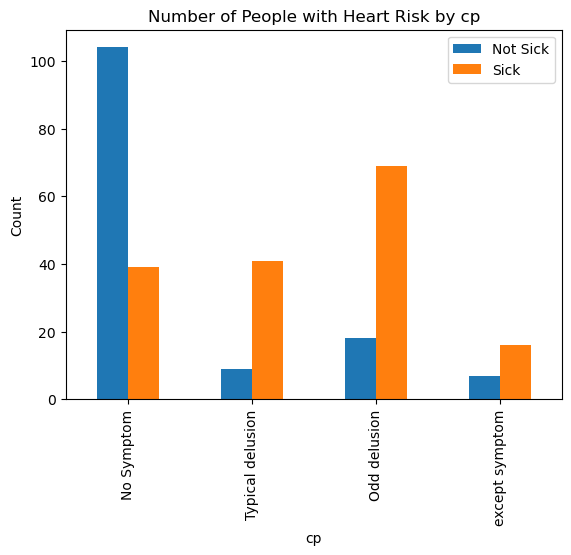

In [10]:
#cp 별 심장위험도 높은사람 낮은사람 구분   
output_counts = heart.groupby("cp")["output"].value_counts().unstack()
output_counts.plot(kind="bar")

plt.xlabel("cp")
plt.ylabel("Count")
plt.title("Number of People with Heart Risk by cp")
plt.legend(["Not Sick", "Sick"])

# cp  0인건 무증상  , 1 = 전형적인 협신증 , 2 = 비정형 협신증 통증 , 3 = 협신증 외 통증 
plt.xticks(range(len(output_counts.index)), ["No Symptom", "Typical delusion", "Odd delusion", "except symptom"])
plt.show()

In [27]:
# heart["slp"].value_counts() #언어 어눌한지 정도. 
# trtbps 안정시 혈압
# restecg 심전도
# chol 콜레스테롤 수치

# heart["trtbps"].value_counts() 90~ 200
# heart["thalachh"].max() #70~ 202 
# heart["chol"].value_counts()  131~ 204 
 


# thalachh 최대심박수
# trtps 안정시 혈압 

# heart["thall"].value_counts()  #0~3 --> 숫자바꾸기 
# heart["trtps"].value_counts()  #0~ 2  --> 숫자 바꾸기 
X=heart[["thall","trtbps"]]


Index(['thall', 'trtbps'], dtype='object')

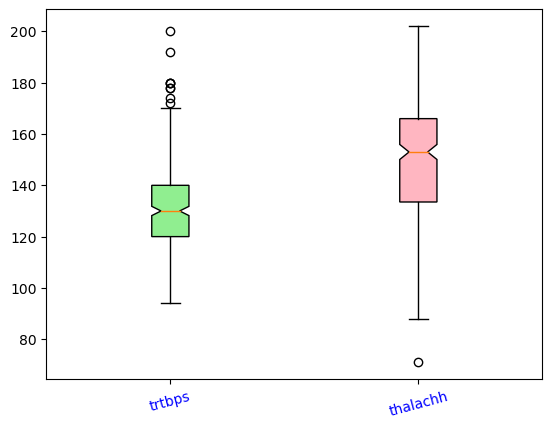

In [33]:
# trtbps 안정시 혈압 , thalachh 최대심박수 범주 

X = heart[[ "trtbps","thalachh"]]
df = pd.DataFrame(X , columns = X.columns)
colors =  ['lightgreen', 'lightpink']
plt.figure()

boxplot = plt.boxplot(df, labels=df.columns, notch=True, patch_artist=True) 
for patch, color in zip(boxplot['boxes'], colors): 
    patch.set_facecolor(color)
plt.xticks(rotation=15, color="blue")
plt.show()

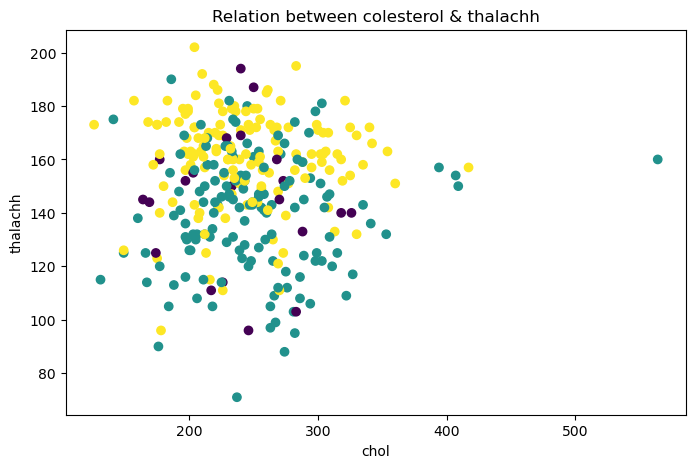

In [124]:
# 콜레스테롤 수치와 최대 심박수를  언어 어눌한지 정도록 구분해서 산포도 그래프 그리기 
df = heart[["trtbps", "thalachh", "chol", "slp"]] 

plt.figure(figsize =(8,5))
plt.scatter(df["chol"], df["thalachh"], c=df["slp"])
plt.xlabel("chol")
plt.ylabel("thalachh")
plt.title("Relation between colesterol & thalachh") 
plt.show()

In [218]:
# 심장도 위험도 정홧도 예측하기. 
# 1. 특성, 목표변수 분리 .
# 2. 전처리 
# 3. 데이터 셋 분리. 
# 4. 모델 생성 및 학습 
# 5. 예측 
# 6. 정확도 예측


#특성, 목표변수 분리 
X = heart.drop("output", axis =1) #특성 변수
y = heart["output"] #목표 변수


#from sklearn.preprocessing import StandardScaler

#데이터 전처리 
scaler = StandardScaler()
X_scaler = scaler.fit_transform(X)

In [220]:
#데이터 셋 분리 
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X_scaler, y, random_state=0)

In [221]:
#모델 생성 및 학습
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr

LogisticRegression()

In [222]:
# 예측 
y = lr.predict(X_test)
y

array([0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 1], dtype=int64)

In [223]:
from sklearn.metrics import accuracy_score
p = accuracy_score(y_test,y)
p

0.8289473684210527

In [ ]:
최종 : 
남녀별 심장 위험도가 남자가 2배 이상 높음 

나이별 평균 콜레스테롤 수치를 계산햇을때 (최소29~ 77살) 
30대 초중반에 낮아지다가 갑자기 높아졌다낮아졌다를 반복해 50살중반부근 70 살부근까지는 비교적 안정적이였다가 70후반에 급격히높아짐

cp 별 심장위험도 높은사람 낮은사람 구분했을때는 비정형 협신증 통증이 다른 것보다 최소 1.5배더 높게 나옴

또한 heatmap 으로 봤을때 유사도가 0.45가 넘는게 없었음. 

언어가 어눌한 사람일수록 대부분 콜레스테롤이 220~240 에 최대심박수 160 주변에 많이 분포해있음. 
그보다 덜 어눌할수록 조금씩 낮음  (어눌함 정도에 따라 20정도차이남)

심장 위험도 정확도는 82% 으로 예측됨. 